# AI305 Lab 3 - Linear Regression

Objective: Build Linear regression model using gradient descent and normal equations



#### Read the dataset and show the first five records.

Datasets are provided as csv file, and `pandas` library is used to read csv files.

`read_csv` function writes the dataset into the variable called `“data”`.

`head()` function returns the first 5 rows of the dataset.

NOTE: the Jupyter notebook and the csv files should be in the same directory to write the code as above, otherwise you have to copy the full path where your csv file is stored:

`data = pd.read_csv(r"Full path\Filename.csv")`

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("train.csv")
print(data.head())

    x          y
0  24  21.549452
1  50  47.464463
2  15  17.218656
3  38  36.586398
4  87  87.288984


After the csv file is read, x and y values should be stored as separate variables in order to be able to work with them. This can be done in many ways.

In this example we will convert the data from a pandas Series to a Python list. This is done to to simplify working with the data in certain algorithms or libraries.

The type of X and Y variables is pandas series. Pandas series is more complex data structure than both numpy arrays and python lists. That is why it requires a lot more time to do operations on pandas series. For this reason, we convert X and Y from pandas series to python lists:

In [ ]:
X1 = data['x']; Y1 = data['y']
X = X1.tolist()
Y = Y1.tolist()

For visualization, matplotlib library is used.

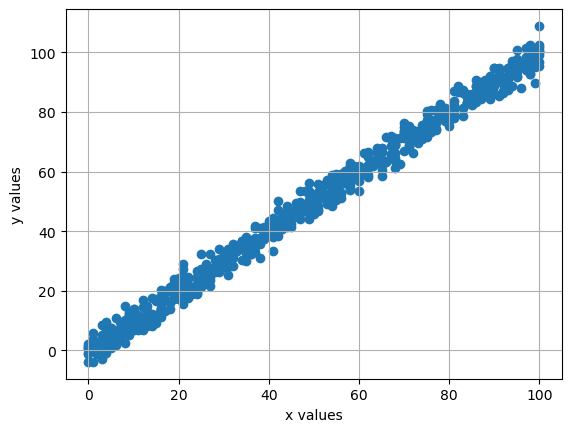

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.grid()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

Every dot in the graph represents one sample from the dataset. As is seen from the output, Linear Regression Algorithm is quite appropriate for this dataset.

## Gradient Descent


#### the hypothesis:
![hx.png](attachment:hx.png)

#### Cost function
![cost.png](attachment:cost.png)
It’s used to calculate how well the line fits the data

#### Gradient Descent
We start the algorithm with random initial values (usually zero) of w and b, thus the cost function will return some high value. So we somehow have to optimize w and b to reduce the return of the cost function. In each iteration gradient descent algorithm updates the values of w and b and the line fits the data better.

![w.png](attachment:w.png)

![b.png](attachment:b.png)

Inputs:
- X: A list or array of input feature values (the independent variable).
- Y: A list or array of target values (the dependent variable).
- w: The initial weight (slope) of the regression line.
- b: The initial bias (intercept) of the regression line.
- alpha: The learning rate, which controls how big the update steps are during gradient descent.

In [ ]:
#alpha - learning rate
def gradient_descent(X, Y, w, b, alpha):

    dl_dw = 0.0 #gradient with respect to the weight w
    dl_db = 0.0 #gradient with respect to the weight b
    N = len(X) #the total number of data points

    #loop Through Data Points to Calculate Gradients
    for i in range(N):
        dl_dw += -1*X[i] * (Y[i] - (w*X[i] + b))
        dl_db += -1*(Y[i] - (w*X[i] + b))

    #update w and b
    #adding a normalization factor 1/float(N) to prevent w and b from becoming too large
    w = w - (1/float(N))* dl_dw * alpha
    b = b -  (1/float(N))* dl_db * alpha

    return w, b

Inputs:
- X: A list or array of input feature values (independent variables).
- Y: A list or array of target values (dependent variables).
- w: The weight (slope) of the linear regression model.
- b: The bias (intercept) of the linear regression model.

In [ ]:
#cost function: Mean Squared Error (MSE)
def cost_function (X, Y, w, b):

    N = len(X)
    total_error = 0.0 #total squared error over all data points (will be updated)

    #loop Through Data Points
    for i in range(N):
        total_error += (Y[i] - (w*X[i] - b))**2

    return total_error / (2*float(N))

#### Function to plot the linear regressor


In [ ]:
def plot_LR (X,Y,w,b):
            plt.grid()
            plt.xlabel("x values")
            plt.ylabel("y values")

            xx=np.linspace(-3,100)
            h=w*xx+b
            plt.plot(xx,h,color="red")
            plt.scatter(X, Y,s=5)
            plt.pause(0.05)
            plt.show()

In [ ]:
def train(X, Y, w, b, alpha, n_iter):

    for i in range(n_iter):
        w, b = gradient_descent(X, Y, w, b, alpha)

        if i % 50 == 0:
            print ("iteration:", i, "cost: ", cost_function(X, Y, w, b))
            plot_LR(X, Y, w, b)

    return w, b

In [ ]:
def predict(x, w, b):
    return x*w + b

## Train the model

iteration: 0 cost:  1560.6930531150774


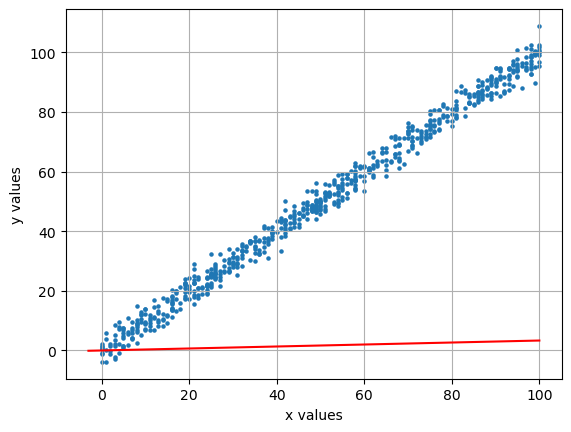

iteration: 50 cost:  56.29383720546444


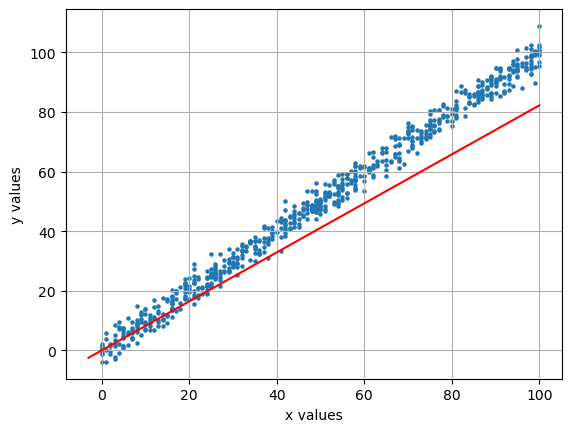

iteration: 100 cost:  5.728466166807908


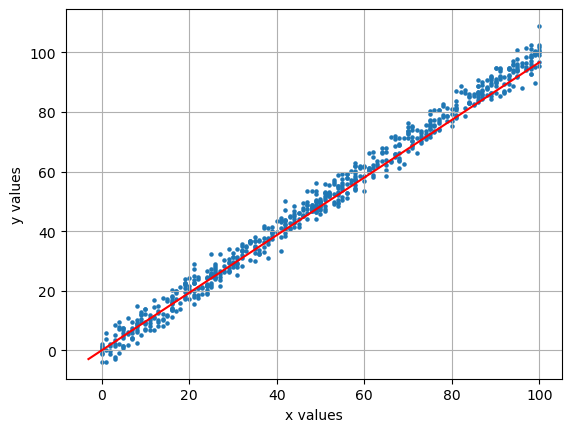

iteration: 150 cost:  4.002556742099759


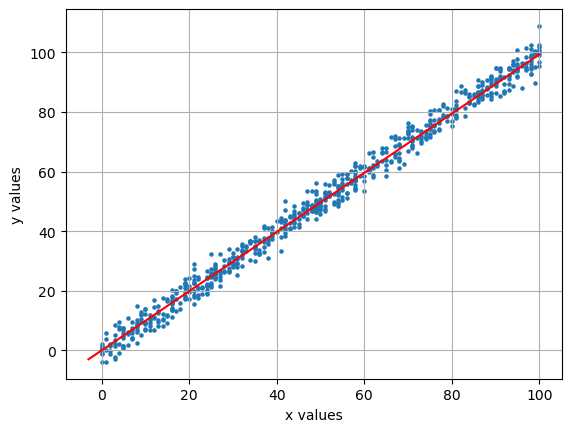

In [ ]:
# w, b = train(X, Y, w, b, alpha, num_iter)
w, b = train(X, Y, 0.0, 0.0, 0.00001, 200)

## Test the model

Now we can use our trained model to predict new values using LR:

In [ ]:
x_new = 50.0 #input feature

#call the predict() function to compute the predicted value y_new based on the input x_new
y_new = predict(x_new, w, b)

print("theta1= ", w)
print("theta0= ",b)
print("the new predicted value",y_new)

theta1=  0.9977055278803528
theta0=  0.014886097345588488
the new predicted value 49.90016249136323


## sklearn linear regression


Use the `LinearRegression` class in the `scikit-learn` library to fit a linear model to the data:

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

Converting the data into DataFrames is necessary because `scikit-learn` models often work well with structured data like DataFrames.

In [ ]:
l_reg = LinearRegression() #create an instance of the model

#convert data into dataframes
X2=pd.DataFrame(X1)
Y2=pd.DataFrame(Y1)

#the model is trained (or "fit") to the data
l_reg.fit(X2, Y2)

LinearRegression()

Extract information about the model’s performance and the parameters it learned during training:
- R² score: tells you how well the model fits the data. It ranges from 0 to 1.
- - 1 means the model perfectly explains all the variance in the target variable.
- - 0 means the model does not explain any of the variance in the target variable.
- Slope: tells you how much the target variable changes for a unit change in the corresponding feature.
- Intercept (bias): is the point where the regression line crosses the y-axis when all feature values are 0.

In [ ]:
# Coefficient of determination
r_squared = l_reg.score(X2, Y2)
print("Coefficient of determination (R²):", r_squared)

# Slope
slope = l_reg.coef_
print("Slope (Coefficients):", slope)

# Intercept
intercept = l_reg.intercept_
print("Intercept:", intercept)

Coefficient of determination (R²): 0.9907015319025518
Slope (Coefficients): [[1.00065638]]
Intercept: [-0.10726546]


Now we can read the test data from the CSV file, then use the trained LR model (l_reg) to make predictions based on the test data.

In [ ]:
testdata = pd.read_csv("test.csv")
x_test = pd.DataFrame(testdata['x']); y_test = pd.DataFrame(testdata['y'])
y_pred = l_reg.predict(x_test)

print(y_pred)

[[76.94327594]
 [20.90651855]
 [21.90717494]
 [19.90586217]
 [35.91636428]
 [14.90258026]
 [61.93343021]
 [94.95509081]
 [19.90586217]
 [ 4.89601644]
 [ 3.89536006]
 [18.90520579]
 [95.95574719]
 [61.93343021]
 [35.91636428]
 [14.90258026]
 [64.93539936]
 [13.90192388]
 [86.94983976]
 [68.93802488]
 [88.95115252]
 [50.92621001]
 [88.95115252]
 [26.91045685]
 [96.95640358]
 [57.93080468]
 [78.9445887 ]
 [20.90651855]
 [92.95377805]
 [26.91045685]
 [98.95771634]
 [30.91308237]
 [32.91439514]
 [79.94524508]
 [27.91111323]
 [46.92358448]
 [52.92752277]
 [68.93802488]
 [27.91111323]
 [32.91439514]
 [90.95246528]
 [70.93933765]
 [49.92555363]
 [75.94261956]
 [ 3.89536006]
 [36.91702066]
 [69.93868127]
 [67.9373685 ]
 [39.91898981]
 [34.9157079 ]
 [93.95443443]
 [87.95049614]
 [51.92686639]
 [30.91308237]
 [58.93146107]
 [-0.10726546]
 [38.91833343]
 [63.93474297]
 [68.93802488]
 [56.9301483 ]
 [12.9012675 ]
 [71.93999403]
 [75.94261956]
 [60.93277383]
 [81.94655785]
 [17.90454941]
 [40.91964

### Calculating R-squared (R2) score.
calculating the R² score for the model's predictions on the test data

In [ ]:
r2_score = l_reg.score(x_test,y_test)
print(r2_score*100,'%') #multiply the R² score by 100 to convert it into a percentage

98.88014444327563 %


# Activities
## 1. Implement the normal equations method and compare the result with the previous results

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("train.csv")
print(data.head())

    x          y
0  24  21.549452
1  50  47.464463
2  15  17.218656
3  38  36.586398
4  87  87.288984


In [ ]:
X1 = data['x'].values.reshape(-1, 1)
Y = data['y'].values.reshape(-1, 1)
ones = np.ones((X1.shape[0], 1))

X = np.concatenate((ones, X1), axis=1)
X

array([[ 1., 24.],
       [ 1., 50.],
       [ 1., 15.],
       ...,
       [ 1., 82.],
       [ 1., 66.],
       [ 1., 97.]])

In [ ]:
X_Transposed = X.T
X_Transposed

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [24., 50., 15., ..., 82., 66., 97.]])

In [ ]:
bracket1 = np.linalg.inv((np.dot(X_Transposed,X)))
bracket1

array([[ 5.70525106e-03, -8.54682634e-05],
       [-8.54682634e-05,  1.70887632e-06]])

In [ ]:
bracket2 = np.dot(X_Transposed,Y)
bracket2

array([[  34907.96855015],
       [2331461.78457846]])

In [ ]:
theta = np.dot(bracket1,bracket2)
theta

array([[-0.10726546],
       [ 1.00065638]])

## 2. Update the gradient descent method for multiple input features

In [55]:
import pandas as pd
import numpy as np



new_data = pd.read_csv("train_multiple_features.csv")
print(new_data.head())

   x1  x2          y
0  24   6  21.549452
1  50  10  47.464463
2  15  10  17.218656
3  38  10  36.586398
4  87   3  87.288984


In [63]:
x1 = new_data['x1']
x2 = new_data['x2']
Y1 = new_data['y']
X1 = x1.tolist()
X2 = x2.tolist()
Y = Y1.tolist()

In [64]:
def gradient_descent(X1, X2, Y, w1, w2, b, alpha):
    dl_dw1 = 0.0
    dl_dw2 = 0.0
    dl_db = 0.0
    N = len(X1)

    for i in range(N):
        prediction = w1 * X1[i] + w2 * X2[i] + b
        error = Y[i] - prediction

        # Gradients
        dl_dw1 += -X1[i] * error
        dl_dw2 += -X2[i] * error
        dl_db += -error

    w1 -= (1 / float(N)) * dl_dw1 * alpha
    w2 -= (1 / float(N)) * dl_dw2 * alpha
    b -= (1 / float(N)) * dl_db * alpha

    return w1, w2, b


In [65]:
def cost_function(X1, X2, Y, w1, w2, b):
    N = len(X1)
    total_error = 0.0

    # Loop through data points
    for i in range(N):
        prediction = w1 * X1[i] + w2 * X2[i] + b
        total_error += (Y[i] - prediction) ** 2

    return total_error / (2 * float(N))

In [66]:
def plot_LR(X1, X2, Y, w1, w2, b):
    plt.grid()
    plt.xlabel("X1 values")
    plt.ylabel("Y values")

    xx = np.linspace(min(X1), max(X1), 100)
    xx2 = np.linspace(min(X2), max(X2), 100)
    h = w1 * xx + w2 * xx2 + b
    plt.plot(xx, h, color="red")

    plt.scatter(X1, Y, s=5)
    plt.pause(0.05)
    plt.show()

In [67]:
def train(X1, X2, Y, w1, w2, b, alpha, n_iter):
    for i in range(n_iter):
        w1, w2, b = gradient_descent(X1, X2, Y, w1, w2, b, alpha)

        if i % 50 == 0:
            print(f"Iteration {i}: Cost = {cost_function(X1, X2, Y, w1, w2, b)}")
            plot_LR(X1, X2, Y, w1, w2, b)

    print(f"Final iteration: w1 = {w1}, w2 = {w2}, b = {b}")

    return w1, w2, b


Iteration 0: Cost = 1559.961346895014


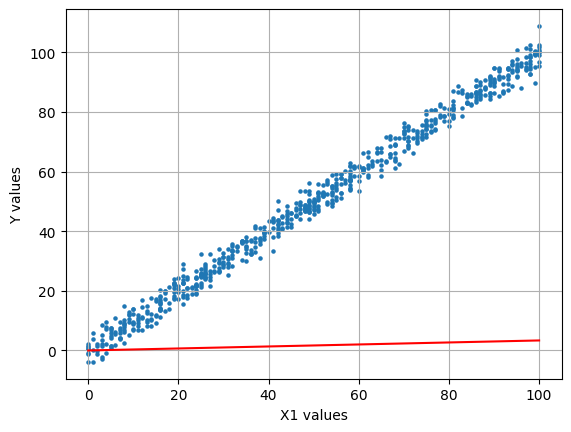

Iteration 50: Cost = 54.97823943750019


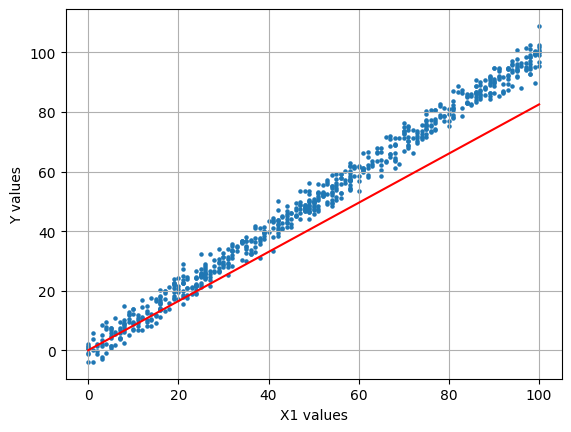

Iteration 100: Cost = 5.670427379265813


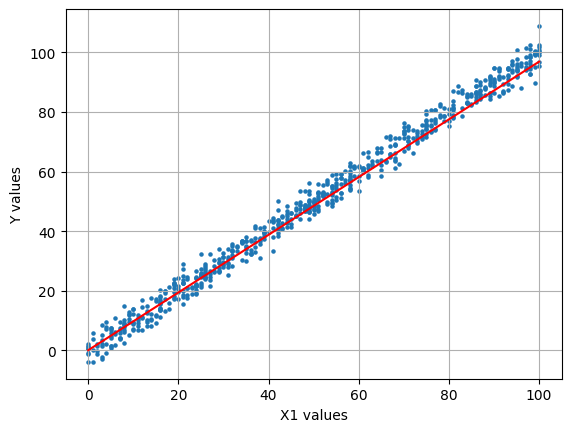

Iteration 150: Cost = 4.053955177311991


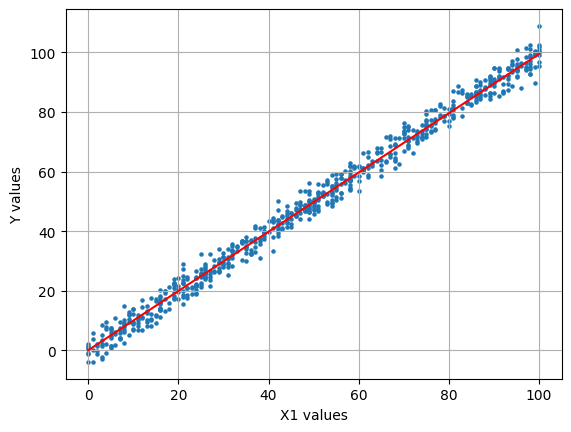

Final iteration: w1 = 0.9916139599774247, w2 = 0.07657495569504005, b = 0.01460490585763073


In [75]:
w1, w2, b = train(X1, X2, Y, 0.0, 0.0, 0.0, 0.00001, 200)

In [76]:
def predict(X1, X2, w1, w2, b):
    return X1 * w1 + X2 * w2 + b

In [77]:
print(predict(77, 7, w1, w2, b)) #Actual = 79.7715
print(predict(21, 8, w1, w2, b)) #Actual = 23.17727887

76.90490451398462
21.45109771094387
